Lexi Huwiler
Dr. Fischer
Probability, Statistics, and Data Computation
19 April 2023
                                                Lab 1

Introduction: In this lab, I will be analyzing data set of greenhouse gas emissions from Our World In Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years. As you may or may not know, CO2 emissions are destroying the planet, and in this investigation I will reveal which countries emit the most and how much they emit. Using graphs and coding analysis I studied the trends and displayed evidence for conclusions of the study.

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Repository 

https://github.com/ahuwiler15/co2emissions/blob/a59cc347d103c497b97618a2141998d46464bded/README.md

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

In [3]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


The data above is from 03/29/23

##### Solution

The Type() function tells us the type of Python data item. From Pandas

In [4]:
type(df)

pandas.core.frame.DataFrame

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

In [5]:
df['country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
46518       Zimbabwe
46519       Zimbabwe
46520       Zimbabwe
46521       Zimbabwe
46522       Zimbabwe
Name: country, Length: 46523, dtype: object

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [6]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [7]:
df = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [8]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

1. No, the datatypes in this info list are not incorrect. Float64 indicates that the value is numeric while the object indicates the value is categorical. For example, 'country' and 'iso_code' are categorical variables and aren't measuring anythingl. The rest of the dataset values should be numbers as they measure co2 and other values related.
2. Yes there are missing (null) values because some of the values in the Non-Null column don't match with the number of entries. There are 39638 entries in the dataset and some of the values are less than 39638 (i.e. 'iso_code','population', and 'gdp').

This function sums up the values in the dataset.

In [10]:
df.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

##### Solution

##### $\rightarrow$ What years are present in the data set?

Using this code below, I am able to just look at the year column from the dataframe.

In [11]:
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

 From 1850-2021. (46523 years)

##### Solution

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



Here I created a list that took all the countries data from the year 2020.

In [12]:
df[df['year'] == 2020]

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
170,Afghanistan,2020,AFG,38972236.0,NaN,0.061,0.002,11.682,0.600,5.416,...,NaN,0.000,0.003,0.008,0.065,NaN,NaN,NaN,NaN,NaN
786,Aland Islands,2020,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
958,Albania,2020,ALB,2866850.0,NaN,1.048,0.366,4.729,-0.219,-4.425,...,NaN,0.000,0.002,0.002,0.029,NaN,NaN,NaN,1.047,22.143
1130,Algeria,2020,DZA,43451668.0,NaN,11.028,0.254,172.504,-7.000,-3.900,...,NaN,4.301,1.169,0.051,0.487,NaN,NaN,NaN,NaN,NaN
1302,American Samoa,2020,ASM,46216.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45561,Wallis and Futuna,2020,WLF,11679.0,NaN,0.000,0.000,0.027,0.001,5.540,...,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
45733,Western Sahara,2020,ESH,556060.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
46177,Yemen,2020,YEM,32284044.0,NaN,0.664,0.021,12.140,-0.544,-4.287,...,NaN,0.402,0.003,-0.038,0.084,NaN,NaN,NaN,NaN,NaN
46349,Zambia,2020,ZMB,18927716.0,NaN,0.961,0.051,7.281,-0.466,-6.022,...,NaN,0.000,0.000,1.520,0.036,NaN,NaN,NaN,0.112,1.540


After creating a list of the CO2 emitters, I used the sort_values function to create a list for the top 10 emitters in the world. 


In [13]:
df[df['year'] == 2020].sort_values(by = 'co2' , ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


Here I defined the top 10 emitters as "top_ten_emitters" so that I can import this new dataset into the later graphs and use it in later analysis.

In [14]:
top_ten_emitters=df[df['year'] == 2020].sort_values(by = 'co2' , ascending = False).head(10).country.values

##### Solution

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

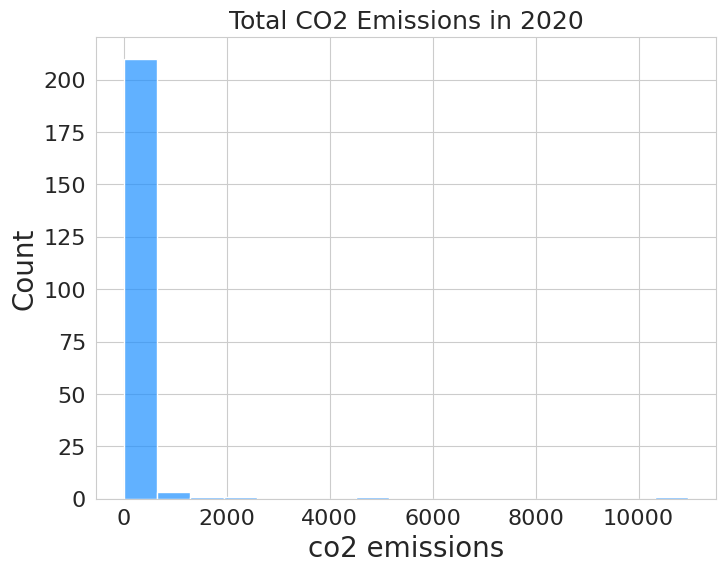

In [15]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label the axes
plt.ylabel('Count',fontsize = 20)
plt.xlabel('co2 emissions',fontsize = 20)
plt.title('Total CO2 Emissions in 2020', fontsize=18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The histogram shows the frequency distribution of one variable 'co2'. The data is skewed because many countries emit less than 1000 co2 in the year 2020. There are little bars farther out in the right of the graph (the outliers).

##### Solution

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

Below I added a swarmplot rather than a strip plot to avoid presenting obsuring points. This way it is easier to see the data presented and to visualize the distribution.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


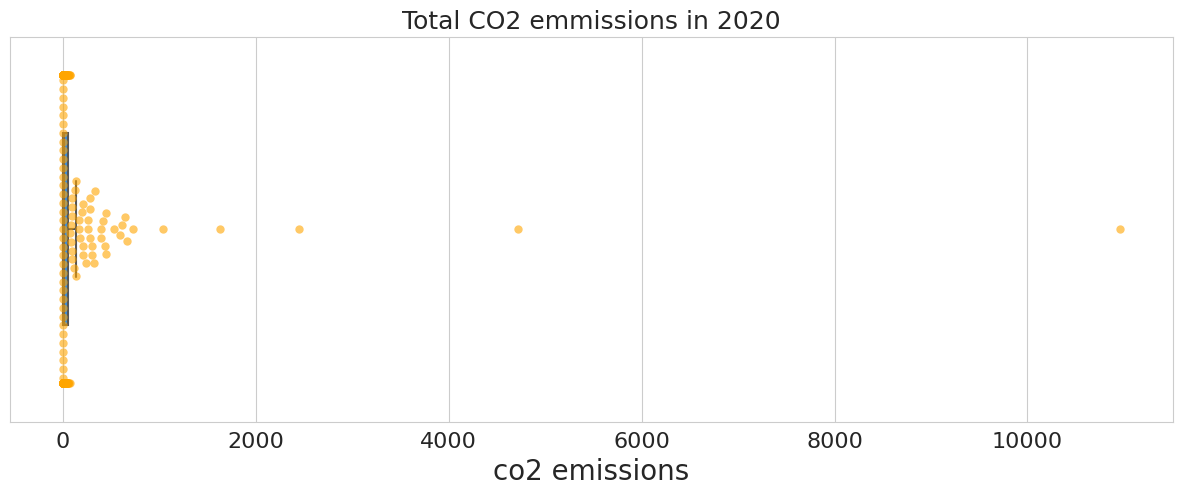

In [16]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize=0)

# Use Seaborn to make the swarm plot
sns.swarmplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('co2 emissions',fontsize = 20)
plt.title('Total CO2 emmissions in 2020', fontsize=18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The boxplot and swarmplot show that there is a skewed distribution and that there are apparent outliers in the data. Most of the data points are close to zero meaning that these countries don't emit as much data as the outlier countries.

##### Solution

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Below I chose to use IQR to find outliers because the data is very skewed and not symmetric. To find the IQR, you subtract Q3 of the data from Q1 of the data. Then multiply the IQR by 1.5 and add it to Q3 or subtract it from Q1 to find outliers.

In [17]:
top10_outliers=df.loc[df['year'] == 2020, 'co2']

In [18]:
Q1 = top10_outliers.quantile(0.25)
Q3 = top10_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

53.836


In [19]:
IQR*1.5+Q3

136.08999999999997

Above I calculated the IQR and used it to see if there were any outliers within the the top 10 emitters. We only needed to calculate for high outliers because the top 10 countries would be the points farthest to the right on the boxplot. Now you may tell that any point beyond 136.09 will be an outlier in this distribution. Below is a table of the top 10 emitters in 2020 and if you look at the column 'co2', you can tell that all the top 10 countries have a greater value for co2 than 136.09, so all of the top 10 emitters are outliers.

In [20]:
df[df['year'] == 2020].sort_values(by = 'co2' , ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


##### Solution

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [27]:
df[df['year'] == 2020].sort_values(by = 'co2' , ascending = False).head(10).isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20136,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
35053,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
21756,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20552,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
36664,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
16794,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20308,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
39259,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


Yes, we are missing some values in the data set. When it says False, that means we are missing that value. 

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

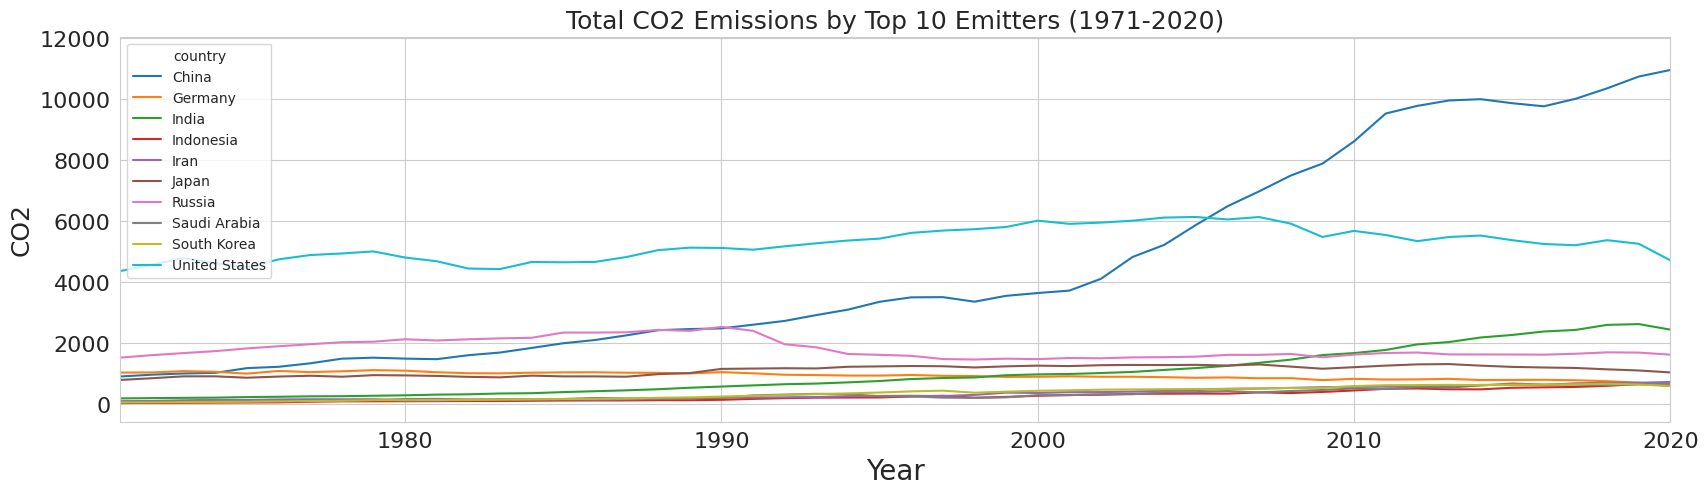

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(top_ten_emitters)], x='year', y='co2', hue='country')
plt.xlim(1971,2020)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2', fontsize = 18)
plt.title('Total CO2 Emissions by Top 10 Emitters (1971-2020)', fontsize=18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### Solution

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

In [23]:
co2_2020 = df.loc[df['year'] == 2020, 'co2']

In [24]:
co2_2020.mean()

160.25767741935482

<Axes: title={'center': 'Total CO2 Emissions by Top 10 Emitters (1971-2020)'}, xlabel='Year', ylabel='CO2'>

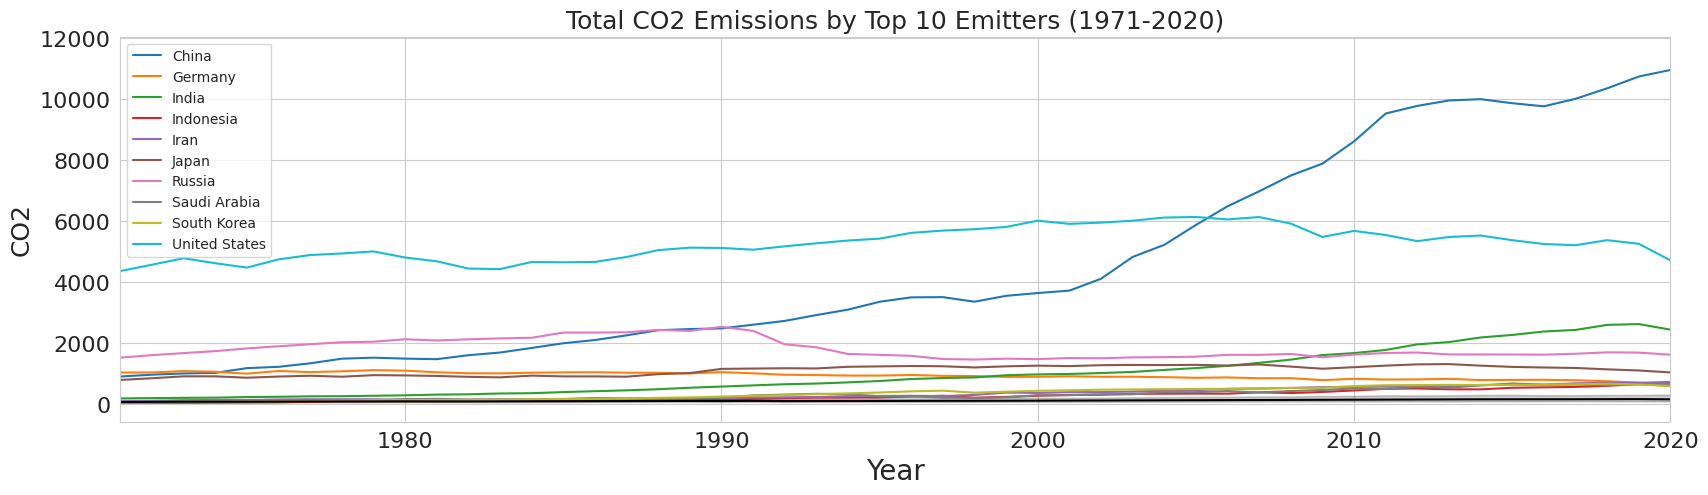

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(top_ten_emitters)], x='year', y='co2', hue='country')
plt.xlim(1971,2020)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2', fontsize = 18)
plt.title('Total CO2 Emissions by Top 10 Emitters (1971-2020)', fontsize=18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

#Add mean total
sns.lineplot(data = df, x = 'year', y = 'co2', color = 'k', estimator=np.mean)

##### Solution

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

<ipython-input-26-adf9e00e9240>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')


Text(0, 0.5, 'CO2')

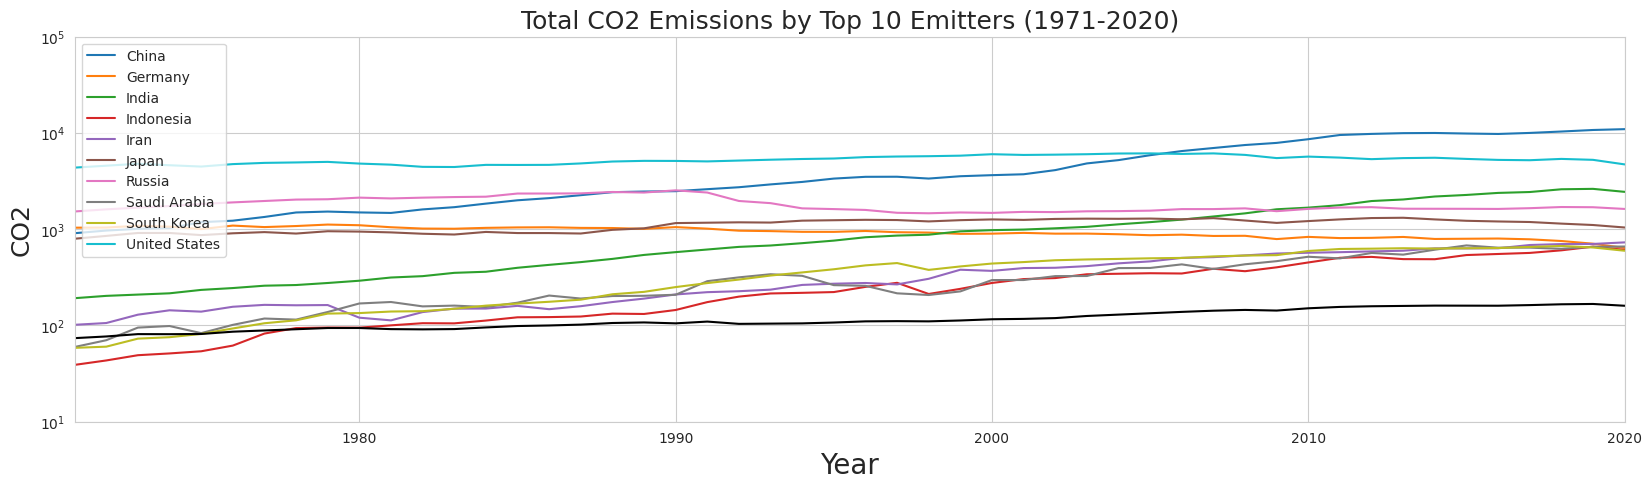

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(top_ten_emitters)], x='year', y='co2', hue='country')

plt.ylim(10**1,10**5)
plt.xlim(1971,2020)
plt.yscale('log')
#Add mean total
sns.lineplot(data = df.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')
plt.title('Total CO2 Emissions by Top 10 Emitters (1971-2020)', fontsize=18)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2', fontsize = 18)

##### Solution

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

From the two graphs above, it is apparent here that there has been an increase in co2 emissions overall for all of the countries within the top 10 emitters category from the year 1971-2020. The black line shows the mean increase of all the countries over the time period, and we can tell that the top 10 countries have shown that they emit far more than the average of all the countries in the dataframe. Throughout this timeframe, the United States have stayed quit steady with their emissions rate; however, China has gradually increased the most, surpassing th U.S. to become the nation with the greatest amount of co2 emissions.

##### Solution